<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202410_AML/blob/main/Talleres/Taller%203/Taller%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

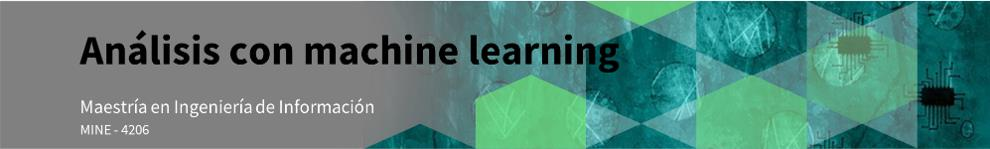

- **Integrante 1:** Lina María Gómez Mesa
- **Integrante 2:** María Catalina Ibáñez Piñeres

---
# Contexto y objetivos.

En la actualidad, la cantidad de artículos publicados en Internet está generando una gran ola de información accesible por cualquier usuario, dando a conocer diferentes puntos de vista, opiniones, información e investigaciones sobre diferentes temas de interés.

Esta gran cantidad de información no solo permite una búsqueda exhaustiva sobre un tema, también permite realizar un análisis sobre la tendencia de los diferentes temas que estén dando de qué hablar en una sociedad. Es por ello que un grupo de expertos se ha dado la tarea de analizar 10.000 artículos web y clasificarlos para poder establecer un análisis de los temas en la actualidad.

Para ello, como experto en análisis con machine learning, le han pedido que construya un modelo capaz de clasificar los nuevos artículos, realice un análisis de cuáles son los temas que dan de que hablar y automatice el proceso de selección y búsqueda de diferentes artículos.

**Objetivos de desarrollo**:

* Realizar el análisis y limpieza de textos.
* Explorar las diferentes técnicas de transformación de datos no estructurados.
* Establecer el mejor modelo basado en una red neuronal.

**Datos**: La fuente de los datos la puedes encontrar en [News Articles Classification Dataset for NLP & ML](https://www.kaggle.com/datasets/banuprakashv/news-articles-classification-dataset-for-nlp-and-ml).

# Entendimiento del negocio.

Para tener un mejor detalle sobre el comportamiento de las variables, solicitamos a la organización el diccionario de datos y nos suministró la siguiente información:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **headlines** | Titular del artículo.|
| **description** | Reseña del artículo.|
| **content** | Contenido del artículo.|
| **url** | Dirección web del artículo.|
| **category** | Representa la temática del artículo.|

# Actividades a realizar.

1. Realizar el análisis exploratorio de componentes principales en la información.

2. Identificar el número de componentes principales apropiado el procesamiento. Genera una tabla comparativa y los gráficos que apoyen este proceso. Recuerda que no deben truncarse los textos. Por último, la elección del número de componentes debe estar debidamente justificada.

3. Construir la red neuronal tomando como insumo los componentes principales procesados en el punto anterior.

4. Construir las gráficas de entrenamiento, validación. Debes interpretar los resultados obtenidos para este modelo base.

5. Realizar la identificación de hiperparámetros, justificando la elección de los valores correspondientes.

**NOTA**: La calificación será sobre notebook ejecutado y cargado en Bloque Neón junto con el archivo HTML.

# 0. Importar librerías

In [17]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay

#Textos
import contractions
import inflect
import nltk
import re, string, unicodedata
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from polyglot.detect import Detector
from wordcloud import WordCloud, STOPWORDS

#Tensorflow y keras
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

#Sistema operativo
import os
import os.path as osp

#Librerías extras
import itertools
from datetime import datetime

print(f"La versión de sklearn es: {sklearn.__version__}")
print(f'La versión de Tensor Flow es:', tf.__version__)

La versión de sklearn es: 1.4.2
La versión de Tensor Flow es: 2.16.1


In [39]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/mariacatalinaibanezpineres/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/mariacatalinaibanezpineres/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/mariacatalinaibanezpineres/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/mariacatalinaibanezpineres/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/mariacatalinaibanezpineres/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.

True

# 1. Introducción a los datos

## 1.1. Configuración del entorno de kaggle

Se hace la conexión con kaggle para poder descargar la base de datos.

In [23]:
!ls -lha kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

-rw-r--r--@ 1 mariacatalinaibanezpineres  staff    75B Apr 12 09:57 kaggle.json


mkdir: /Users/mariacatalinaibanezpineres/.kaggle: File exists


Se verifica la conectividad con el entorno de kaggle.

In [15]:
!kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          24203        482  0.9411765        
bhavikjikadara/student-study-performance                    Student Study Performance                        9KB  2024-03-07 06:14:09          11974        154  1.0              
sukhmandeepsinghbrar/housing-price-dataset                  Housing Price Dataset                          780KB  2024-04-04 19:45:43           1425         27  1.0              
muhammadkashif724/netflix-tv-shows-2021                     Netflix TV Shows 2021                        

Se descarga la base de datos.

In [3]:
!kaggle datasets download banuprakashv/news-articles-classification-dataset-for-nlp-and-ml

Dataset URL: https://www.kaggle.com/datasets/banuprakashv/news-articles-classification-dataset-for-nlp-and-ml
License(s): Apache 2.0
 90%|██████████████████████████████████▏   | 5.00M/5.57M [00:00<00:00, 8.79MB/s]
100%|██████████████████████████████████████| 5.57M/5.57M [00:00<00:00, 7.79MB/s]


In [24]:
ROOT_DIR = 'content'
DATASET_NAME = 'news-articles-classification-dataset-for-nlp-and-ml'

In [25]:
print(f"!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}")

!unzip news-articles-classification-dataset-for-nlp-and-ml.zip -d content/news-articles-classification-dataset-for-nlp-and-ml


Se descomprime el archivo en una carpeta previamente creada llamada content

In [27]:
#%cd {ROOT_DIR}
!mkdir content/{DATASET_NAME}
!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

Archive:  news-articles-classification-dataset-for-nlp-and-ml.zip
  inflating: content/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv  
  inflating: content/news-articles-classification-dataset-for-nlp-and-ml/education_data.csv  
  inflating: content/news-articles-classification-dataset-for-nlp-and-ml/entertainment_data.csv  
  inflating: content/news-articles-classification-dataset-for-nlp-and-ml/sports_data.csv  
  inflating: content/news-articles-classification-dataset-for-nlp-and-ml/technology_data.csv  


Se genera la ruta del directorio para cargar la información.

In [28]:
DATA_DIR = f"{ROOT_DIR}/{DATASET_NAME}"
print(DATA_DIR)

content/news-articles-classification-dataset-for-nlp-and-ml


## 1.2. Separación de la información. 

Se listan los archivos dentro de la carpeta

In [29]:
csv_files = os.listdir(DATA_DIR)

train_df = pd.DataFrame()
test_df = pd.DataFrame()

for csv_file in csv_files:
  new_df = pd.read_csv(osp.join(DATA_DIR, csv_file))
  train, test = train_test_split(new_df, test_size=0.2, random_state=19)
  train_df = pd.concat([train_df, train])
  test_df = pd.concat([test_df, test])

train_df.head()

headlines  \
636  Rajinikanth fan mocks Vijay starrer The Greate...   
161  Agastya Nanda says he probably didn’t deserve ...   
855  Malaikottai Valiban new poster out: Mohanlal i...   
24   Hanu Man actor Teja Sajja on the responsibilit...   
252  Arun Matheswaran: ‘Captain Miller is my least ...   

                                           description  \
636  A Rajinikanth fan shared a poster of Will Smit...   
161  Agastya Nanda also revealed why he did not fee...   
855  Lijo Jose Pellissery and Mohanlal have been ti...   
24   Teja Sajja and Prasanth Varma's Hanu Man has p...   
252  Arun Matheswaran calls Dhanush one of the shar...   

                                               content  \
636  Director Venkat Prabhu has never shied away fr...   
161  Actor Agastya Nanda, who was recently seen in ...   
855  If Kalki AD 2989 is the next big thing in the ...   
24   Actor Teja Sajja’s mythological film Hanu Man,...   
252  Speaking at the audio launch of Captain Miller...   

                                                   url       category  
636  https://indianexpress.com/article/entertainmen...  entertainment  
161  https://indianexpress.com/article/entertainmen...  entertainment  
855  https://indianexpress.com/article/entertainmen...  entertainment  
24   https://indianexpress.com/article/entertainmen...  entertainment  
252  https://indianexpress.com/article/entertainmen...  entertainment

Se mira el número de instancias para cada uno de los conjuntos de datos.

In [30]:
train_count = train_df.shape[0]
test_count = test_df.shape[0]

print("-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------")
print(f"-> Train: {train_count:,}")
print(f"-> Test: {test_count:,}")

-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------
-> Train: 8,000
-> Test: 2,000


Se verifican las categorías

In [31]:
train_df["category"].value_counts()

category
entertainment    1600
education        1600
business         1600
technology       1600
sports           1600
Name: count, dtype: int64

In [32]:
test_df["category"].value_counts()

category
entertainment    400
education        400
business         400
technology       400
sports           400
Name: count, dtype: int64

Se definen las variables X e Y para el modelo

In [33]:
target_feature = 'category'

In [34]:
x_feature = 'content'

Se genera una copia de la información para no modificar la original para el proceso exploratorio de transformación de los datos:

In [35]:
X_train_trans = train_df.copy()
X_train_trans

headlines  \
636   Rajinikanth fan mocks Vijay starrer The Greate...   
161   Agastya Nanda says he probably didn’t deserve ...   
855   Malaikottai Valiban new poster out: Mohanlal i...   
24    Hanu Man actor Teja Sajja on the responsibilit...   
252   Arun Matheswaran: ‘Captain Miller is my least ...   
...                                                 ...   
936   Women’s World Cup: Deepti Sharma, Richa Ghosh ...   
1378  Former state-level Punjab hockey player lifts ...   
757   ‘I told Babar Azam and Saqlain Mushtaq to drop...   
622   Watch: RB Leipzig’s Benjamin Henrichs’ handbal...   
1629           Asia Cup set to be moved out of Pakistan   

                                            description  \
636   A Rajinikanth fan shared a poster of Will Smit...   
161   Agastya Nanda also revealed why he did not fee...   
855   Lijo Jose Pellissery and Mohanlal have been ti...   
24    Teja Sajja and Prasanth Varma's Hanu Man has p...   
252   Arun Matheswaran calls Dhanush one of the shar...   
...                                                 ...   
936   Windies slump to 15th straight loss, eighth su...   
1378  Kumar, who was part of Sports Authority of Ind...   
757   Rizwan claimed in an interview to Cricket Paki...   
622   The incident occurred late in the game after L...   
1629  UAE could be the venue; BCCI ok with PCB hosti...   

                                                content  \
636   Director Venkat Prabhu has never shied away fr...   
161   Actor Agastya Nanda, who was recently seen in ...   
855   If Kalki AD 2989 is the next big thing in the ...   
24    Actor Teja Sajja’s mythological film Hanu Man,...   
252   Speaking at the audio launch of Captain Miller...   
...                                                 ...   
936   With four needed to win, Richa Ghosh lined up ...   
1378  He stands out like a sore thumb, as for some i...   
757   Interesting developments across the border in ...   
622   RB Leipzig’s Benjamin Henrichs’ handball incid...   
1629  The Board of Control for Cricket in India (BCC...   

                                                    url       category  
636   https://indianexpress.com/article/entertainmen...  entertainment  
161   https://indianexpress.com/article/entertainmen...  entertainment  
855   https://indianexpress.com/article/entertainmen...  entertainment  
24    https://indianexpress.com/article/entertainmen...  entertainment  
252   https://indianexpress.com/article/entertainmen...  entertainment  
...                                                 ...            ...  
936   https://indianexpress.com/article/sports/crick...         sports  
1378  https://indianexpress.com/article/sports/forme...         sports  
757   https://indianexpress.com/article/sports/crick...         sports  
622   https://indianexpress.com/article/sports/footb...         sports  
1629  https://indianexpress.com/article/sports/crick...         sports  

[8000 rows x 5 columns]

## 1.3. Exploración de los datos

Se va a generar un `WordCloud` para visualizar las palabras más frecuentes en las categorías.

Se inicia definiendo una función:

In [36]:
def show_wordcloud(palabras,stopwords=[]):
    comment_words = ''

    # iterate through the csv file
    for val in palabras:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

Se genera el llamada para cada una de las clases:

---------- Words for class: entertainment ----------


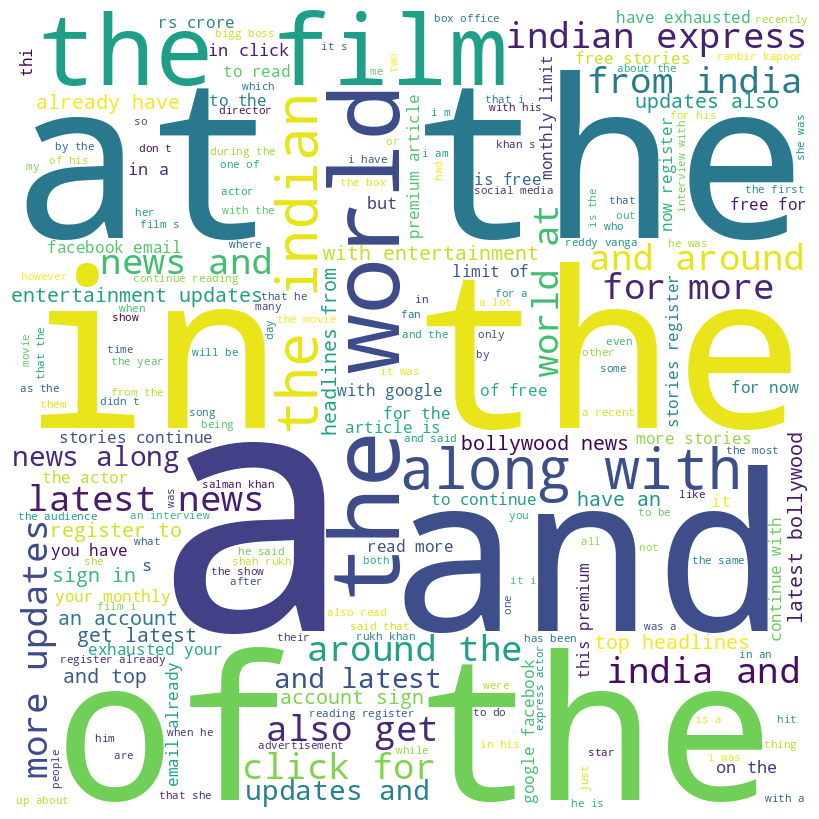

---------- Words for class: education ----------


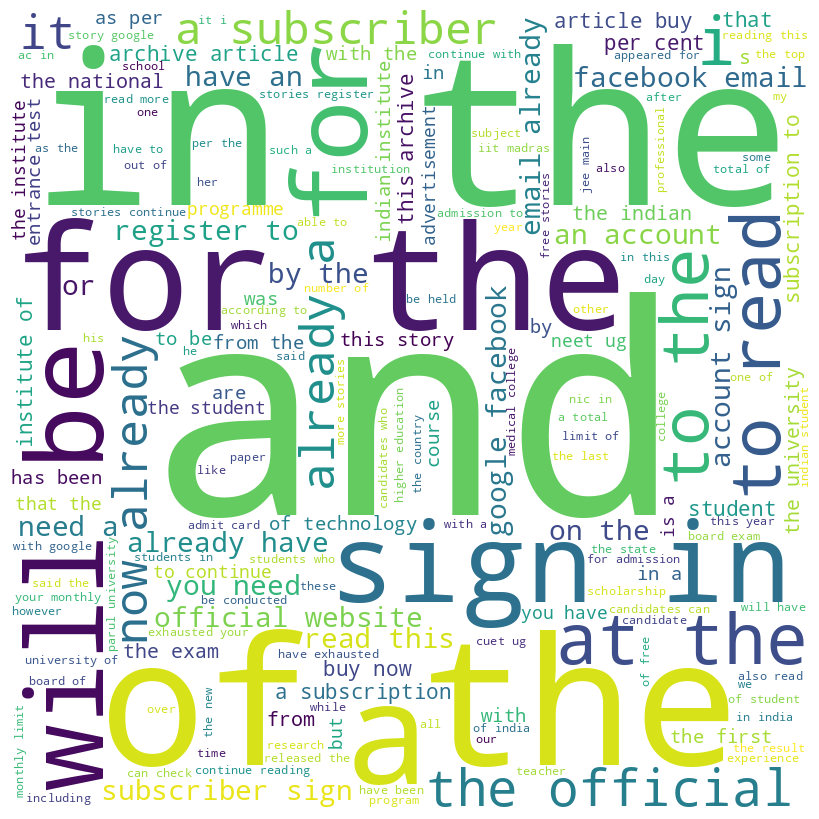

---------- Words for class: business ----------


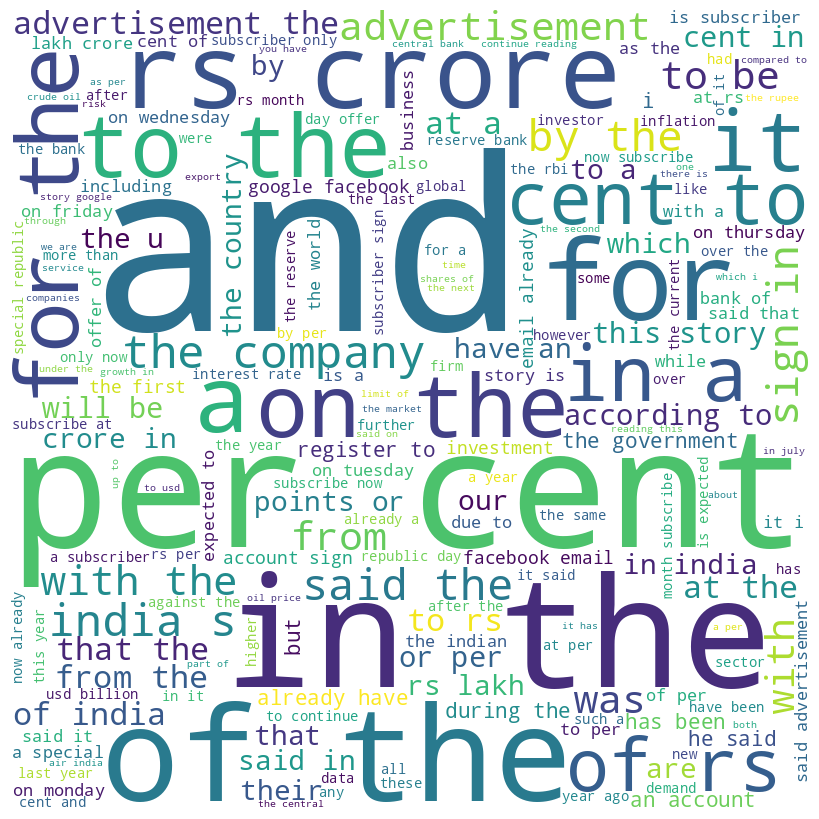

---------- Words for class: technology ----------


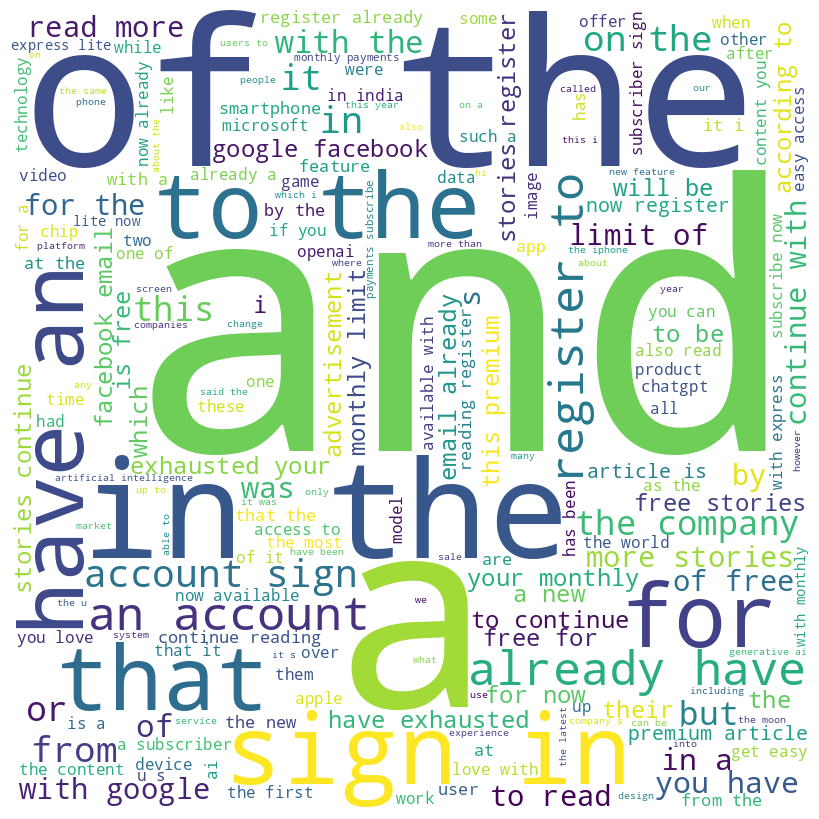

---------- Words for class: sports ----------


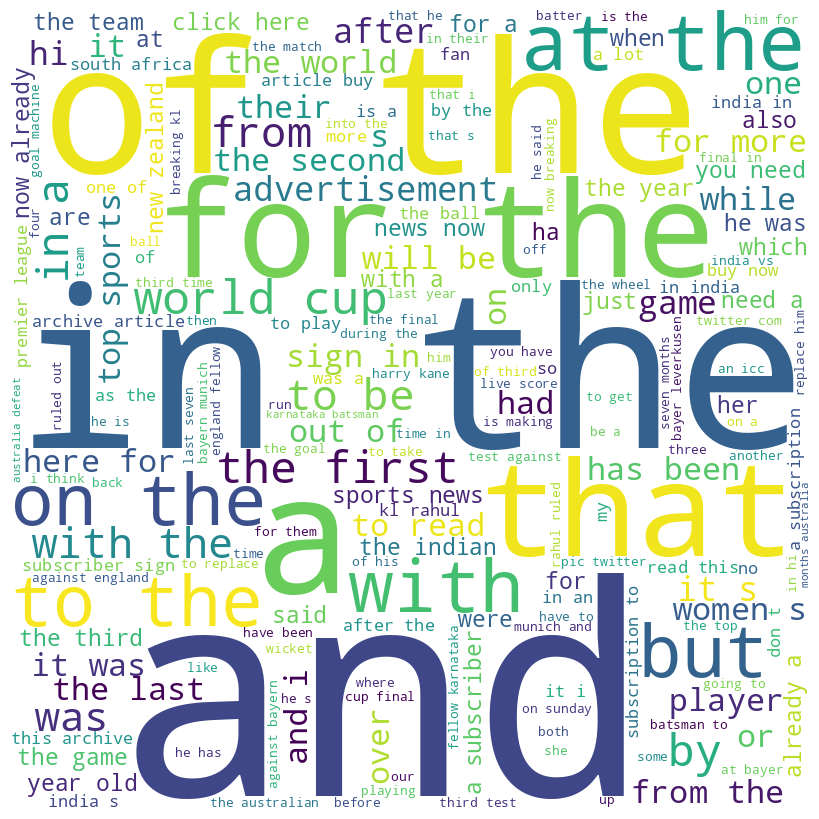

In [37]:
for i in train_df[target_feature].unique():
    print(f'---------- Words for class: {i} ----------')
    show_wordcloud(train_df.loc[train_df[target_feature]==i, x_feature])

Como se puede ver, hay varias palabras que se repiten en las diferentes categorías, lo que puede generar ruido en el modelo, ya que no aportan mucha información, esas palabras se conocen como `stopwords`. Se va a proceder a eliminarlas y a realizar un nuevo `WordCloud` para visualizar las palabras más frecuentes en las categorías.

In [40]:
stop_words = stopwords.words('english')

---------- Words for class: entertainment ----------


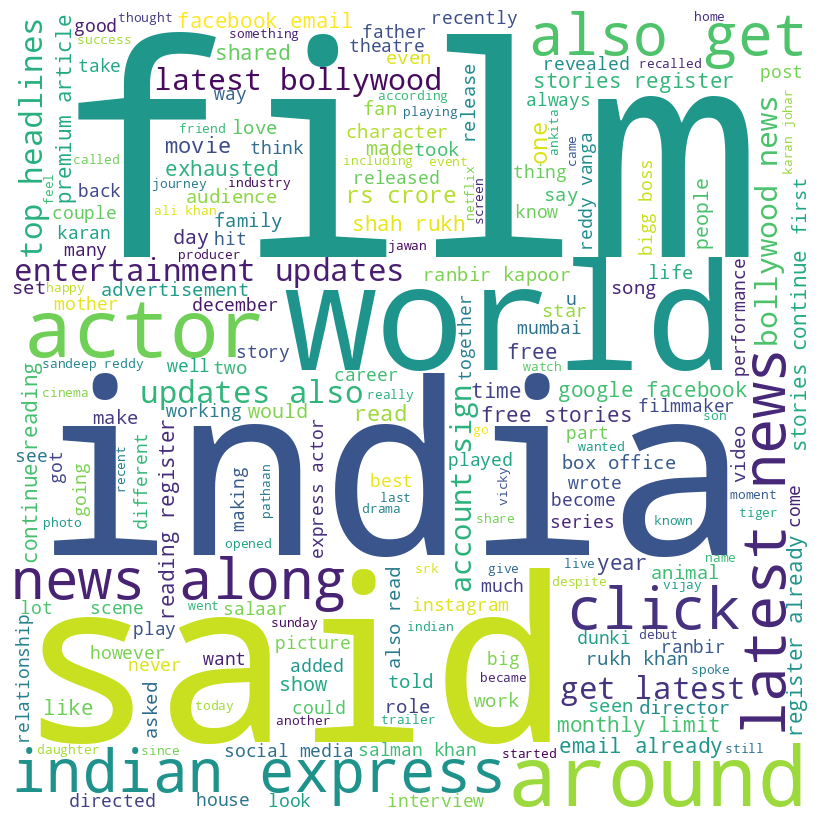

---------- Words for class: education ----------


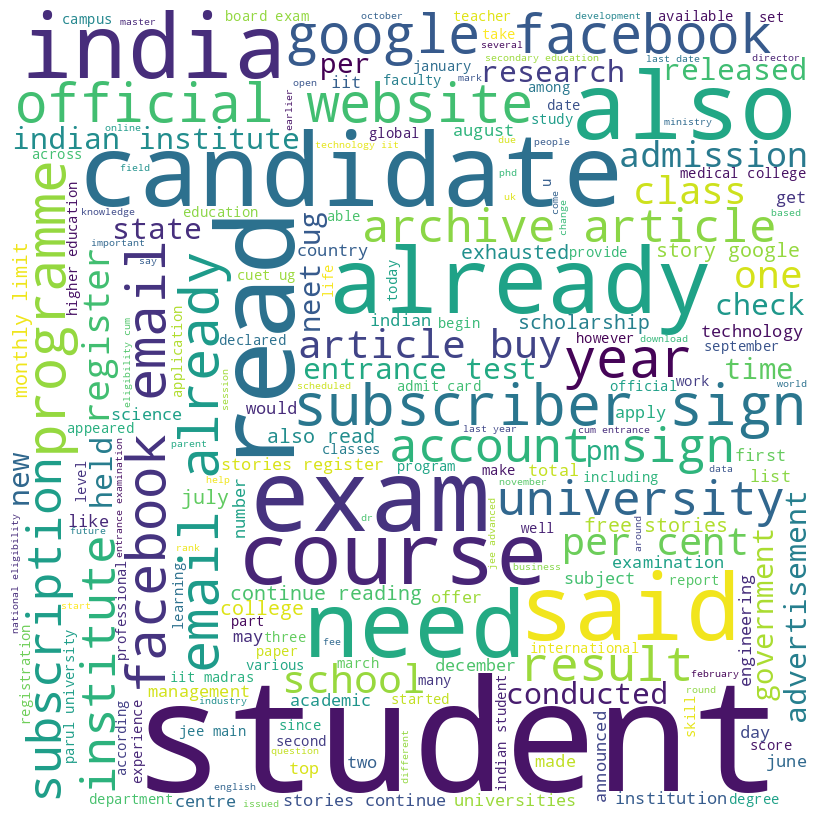

---------- Words for class: business ----------


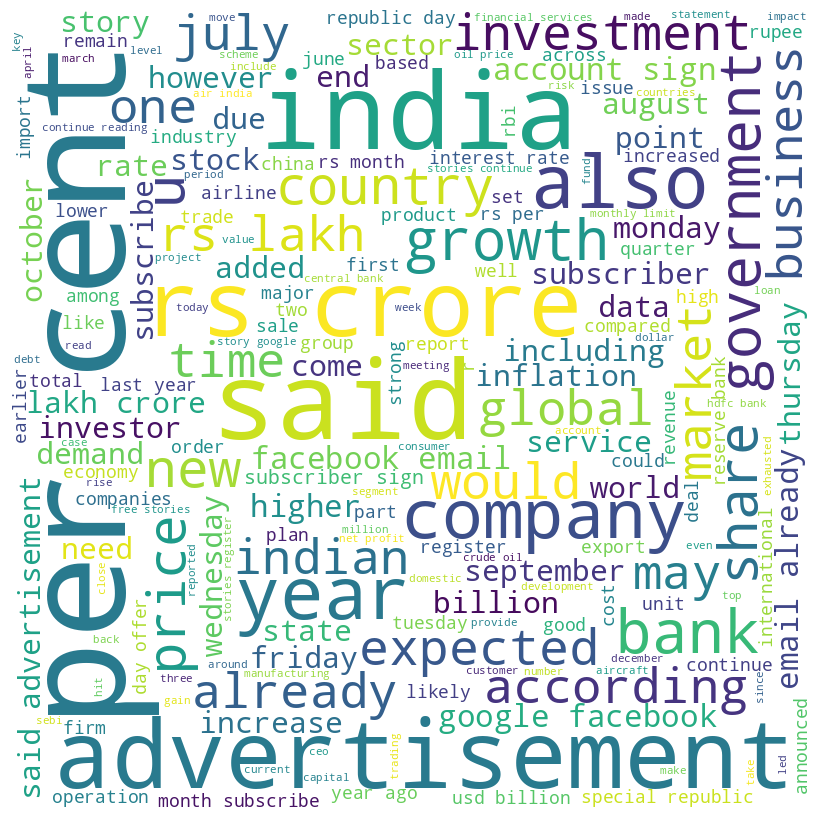

---------- Words for class: technology ----------


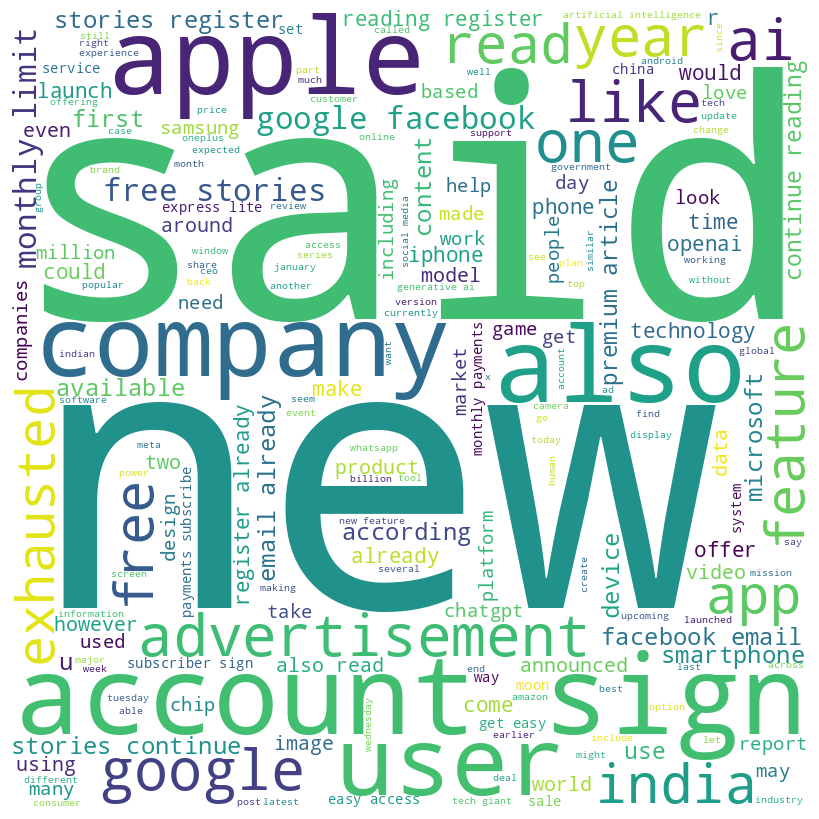

---------- Words for class: sports ----------


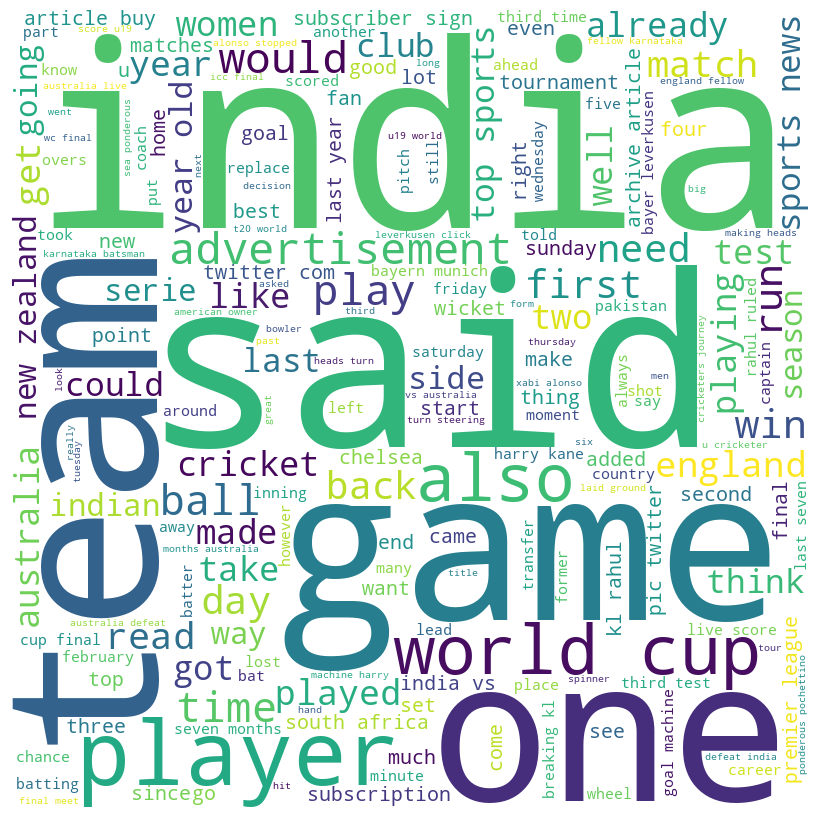

In [41]:
for i in train_df[target_feature].unique():
    print(f'---------- Words for class: {i} ----------')
    show_wordcloud(train_df.loc[train_df[target_feature]==i, x_feature], stop_words)

$\textbf{!TODO}$
Revisar lo del idioma